# Example - Plotting timetraces with bursts

*This notebook is part of smFRET burst analysis software [FRETBursts](http://opensmfs.github.io/FRETBursts/).*

> In this notebook shows how to plot timetraces with burst information.
> For a complete tutorial on burst analysis see 
> [FRETBursts - us-ALEX smFRET burst analysis](FRETBursts - us-ALEX smFRET burst analysis.ipynb).

In [1]:
from fretbursts import *

 - Optimized (cython) burst search loaded.
 - Optimized (cython) photon counting loaded.
--------------------------------------------------------------
 You are running FRETBursts (version 0.6.5+5.g5243bc2).

 If you use this software please cite the following paper:

   FRETBursts: An Open Source Toolkit for Analysis of Freely-Diffusing Single-Molecule FRET
   Ingargiola et al. (2016). http://dx.doi.org/10.1371/journal.pone.0160716 

--------------------------------------------------------------


In [2]:
sns = init_notebook(apionly=True)
print('seaborn version: ', sns.__version__)

seaborn version:  0.8.0


In [3]:
# Tweak here matplotlib style
import matplotlib as mpl
mpl.rcParams['font.sans-serif'].insert(0, 'Arial')
mpl.rcParams['font.size'] = 12
%config InlineBackend.figure_format = 'retina'
from IPython.display import display

# Get and process data

In [4]:
url = 'http://files.figshare.com/2182601/0023uLRpitc_NTP_20dT_0.5GndCl.hdf5'
download_file(url, save_dir='./data')
full_fname = "./data/0023uLRpitc_NTP_20dT_0.5GndCl.hdf5"

d = loader.photon_hdf5(full_fname)
loader.alex_apply_period(d)
d.calc_bg(bg.exp_fit, time_s=1000, tail_min_us=(800, 4000, 1500, 1000, 3000))
d.burst_search(min_rate_cps=8e3)
ds = d.select_bursts(select_bursts.size, add_naa=True, th1=40)
dsf = ds.fuse_bursts(ms=10)

URL:  http://files.figshare.com/2182601/0023uLRpitc_NTP_20dT_0.5GndCl.hdf5
File: 0023uLRpitc_NTP_20dT_0.5GndCl.hdf5
 
File already on disk: /Users/anto/src/FRETBursts/notebooks/data/0023uLRpitc_NTP_20dT_0.5GndCl.hdf5 
Delete it to re-download.


# Total photons (after ALEX selection):     2,259,522
#  D  photons in D+A excitation periods:      721,537
#  A  photons in D+A excitation periods:    1,537,985
# D+A photons in  D  excitation period:     1,434,842
# D+A photons in  A  excitation period:       824,680

 - Calculating BG rates ... 

[DONE]


 - Performing burst search (verbose=False) ...

[DONE]


 - Calculating burst periods ...

[DONE]


 - Counting D and A ph and calculating FRET ... 


   - Applying background correction.


   [DONE Counting D/A]


 - - - - - CHANNEL  1 - - - - 


 --> END Fused 1186 bursts (25.1%, 9 iter)



 - Counting D and A ph and calculating FRET ... 


   - Applying background correction.


   [DONE Counting D/A and FRET]


# Plot Timetraces


Default plot:

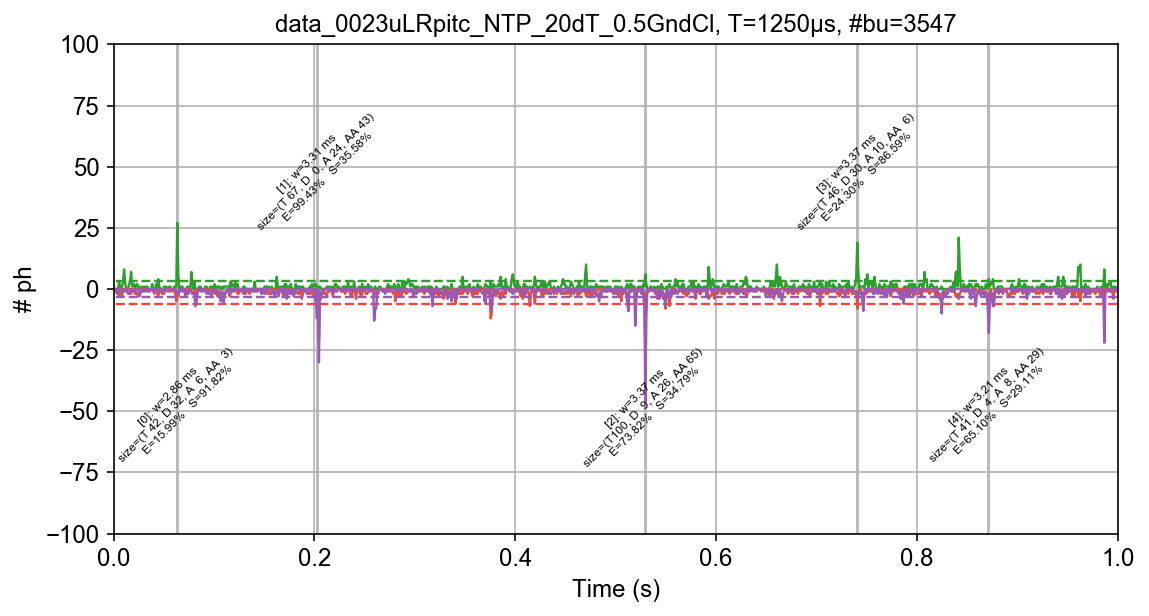

In [5]:
dplot(dsf, timetrace, tmin=0, tmax=1, bursts=True);

We can plot a longer figure that scrolls horizontally in the notebook:

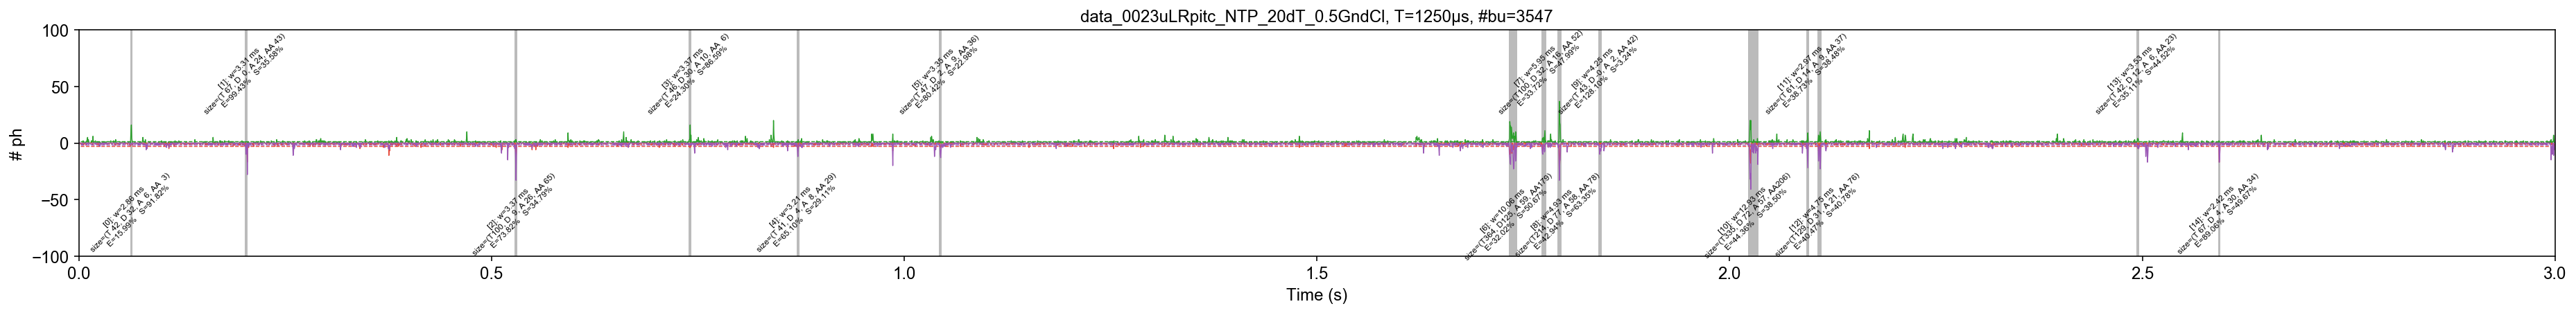

In [6]:
fig, ax = plt.subplots(figsize=(32, 3))
dplot(dsf, timetrace, tmin=0, tmax=3, binwidth=0.5e-3, bursts=True, 
      ax=ax, plot_style=dict(lw=0.7))
plt.xlim(0, 3)
plt.grid(False)

Using the previous plot we can sample different times of the measurement to have an overview of the timetrace:

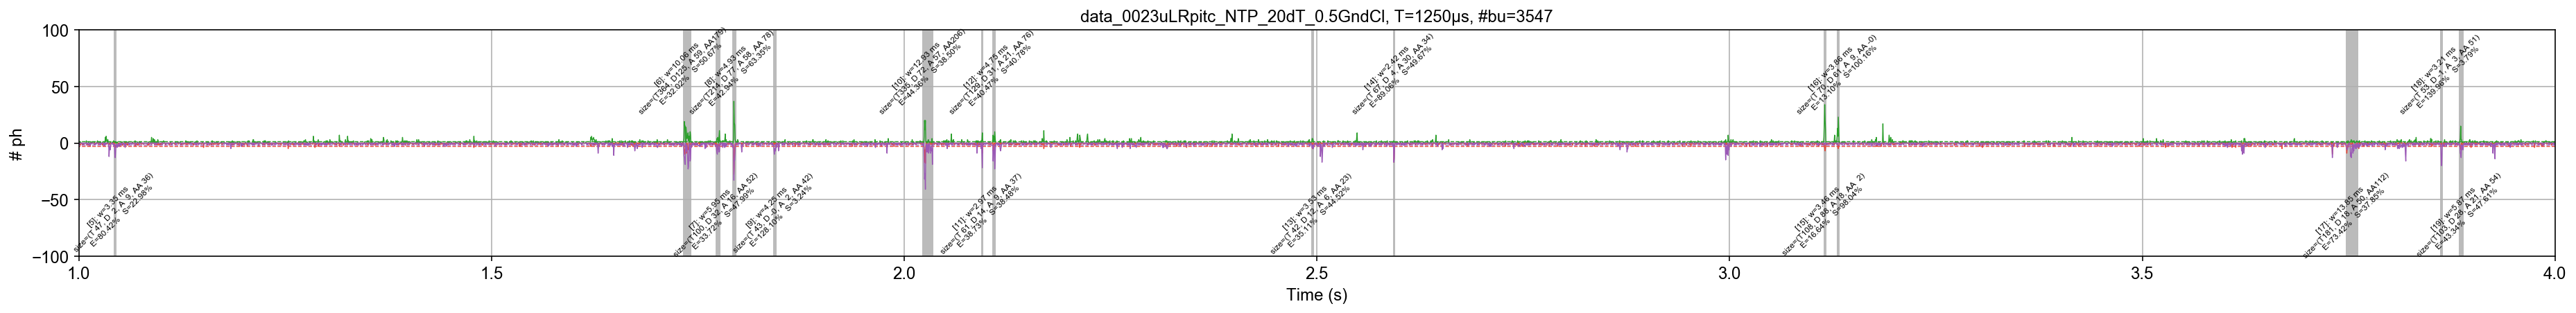

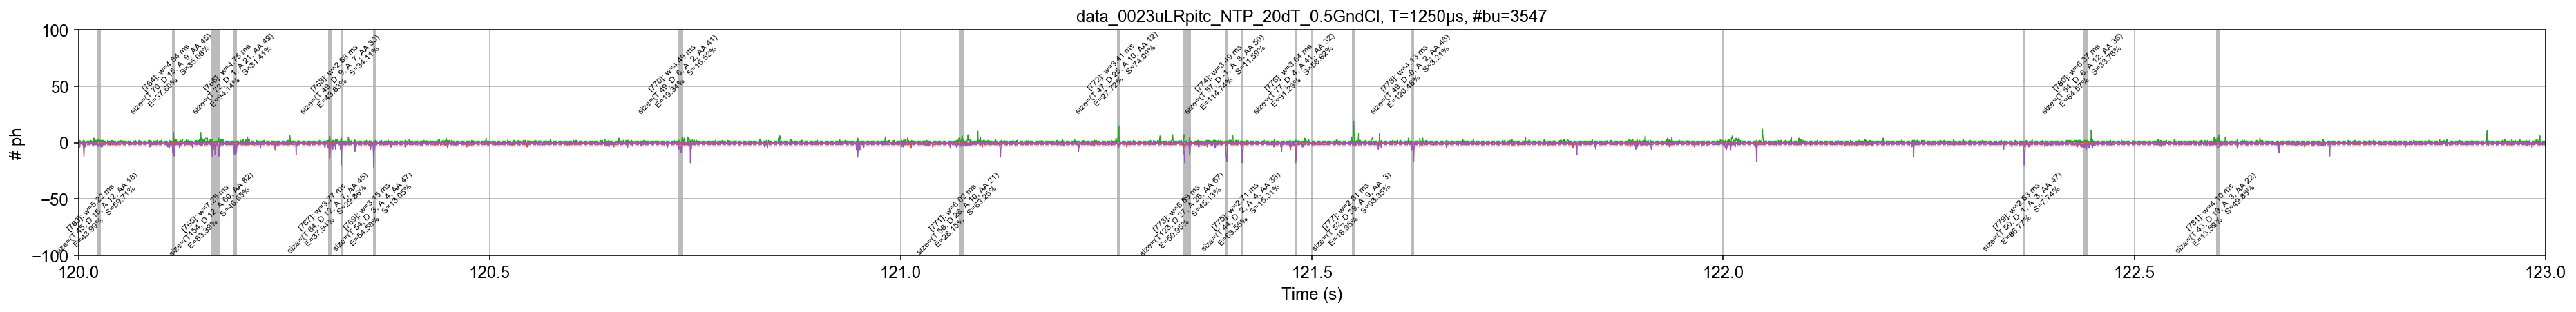

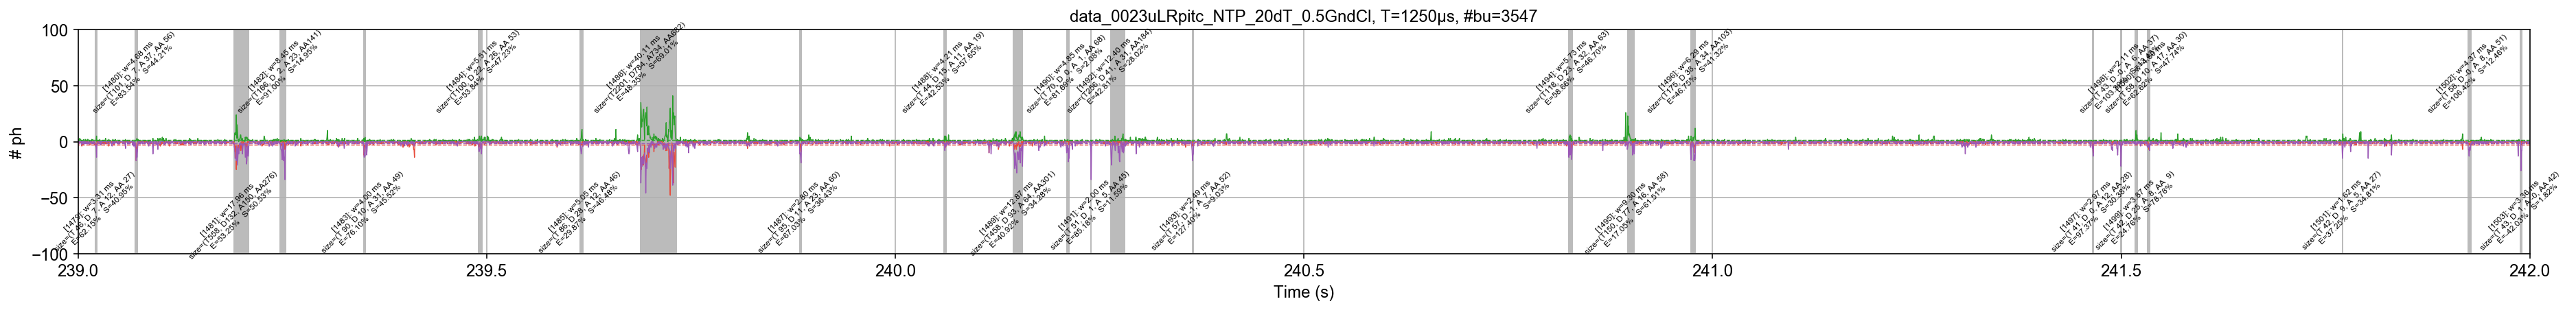

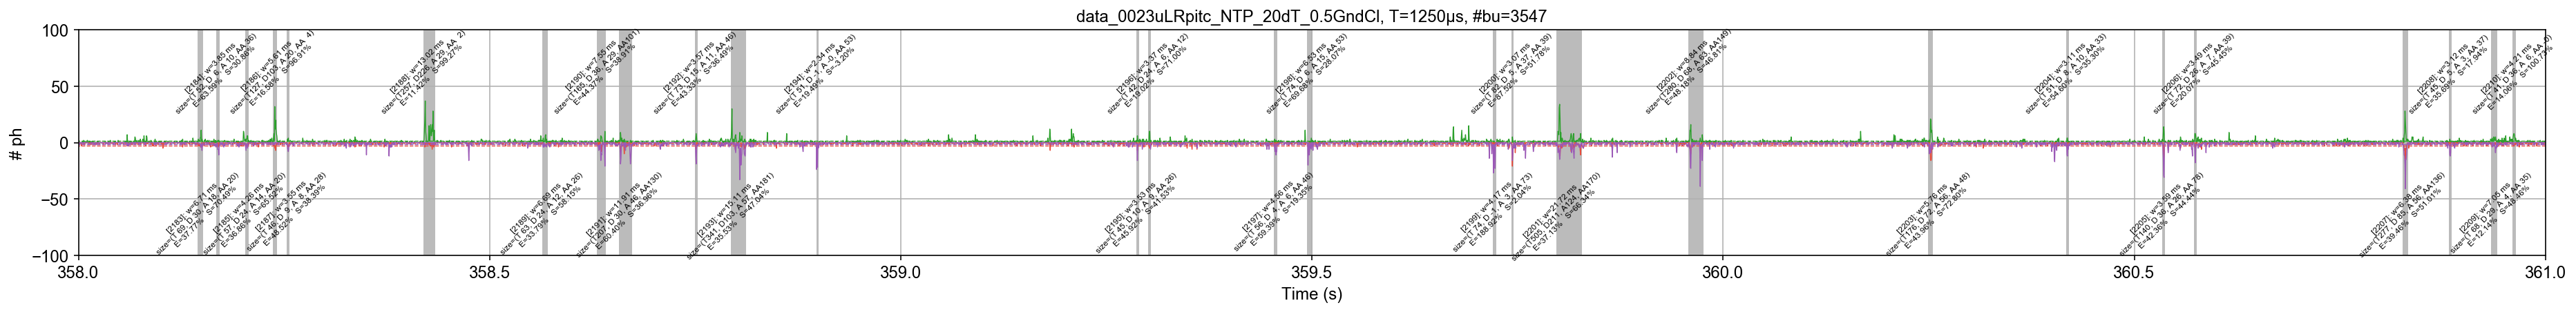

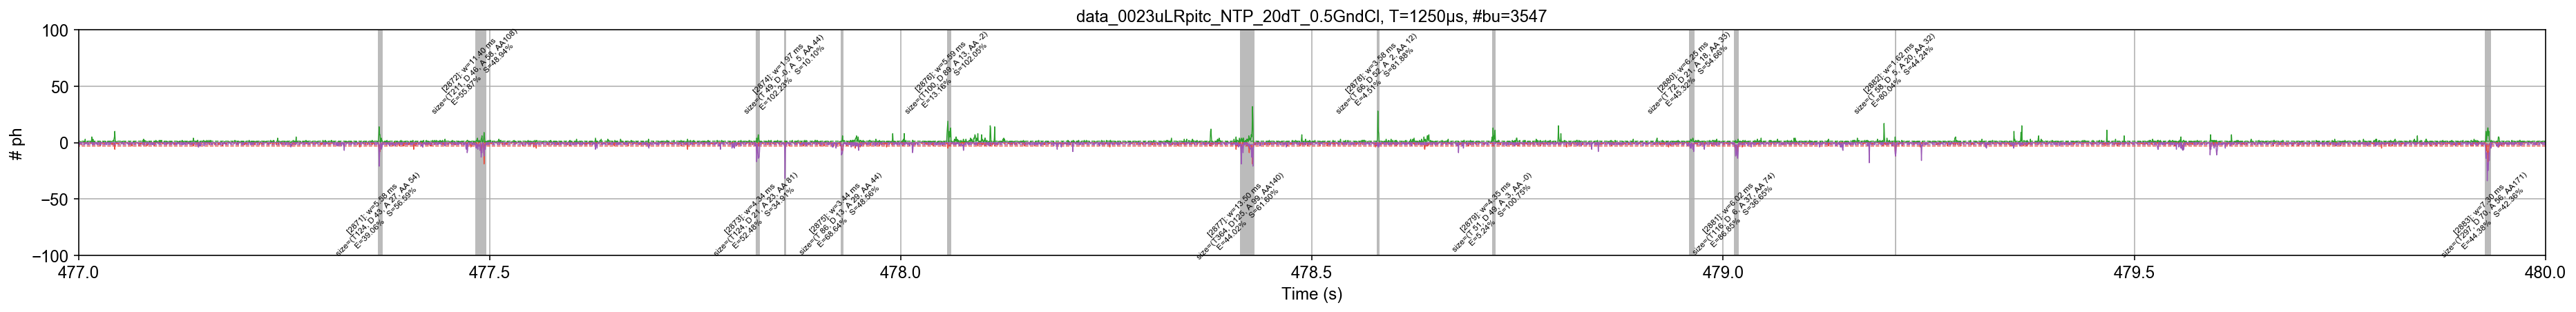

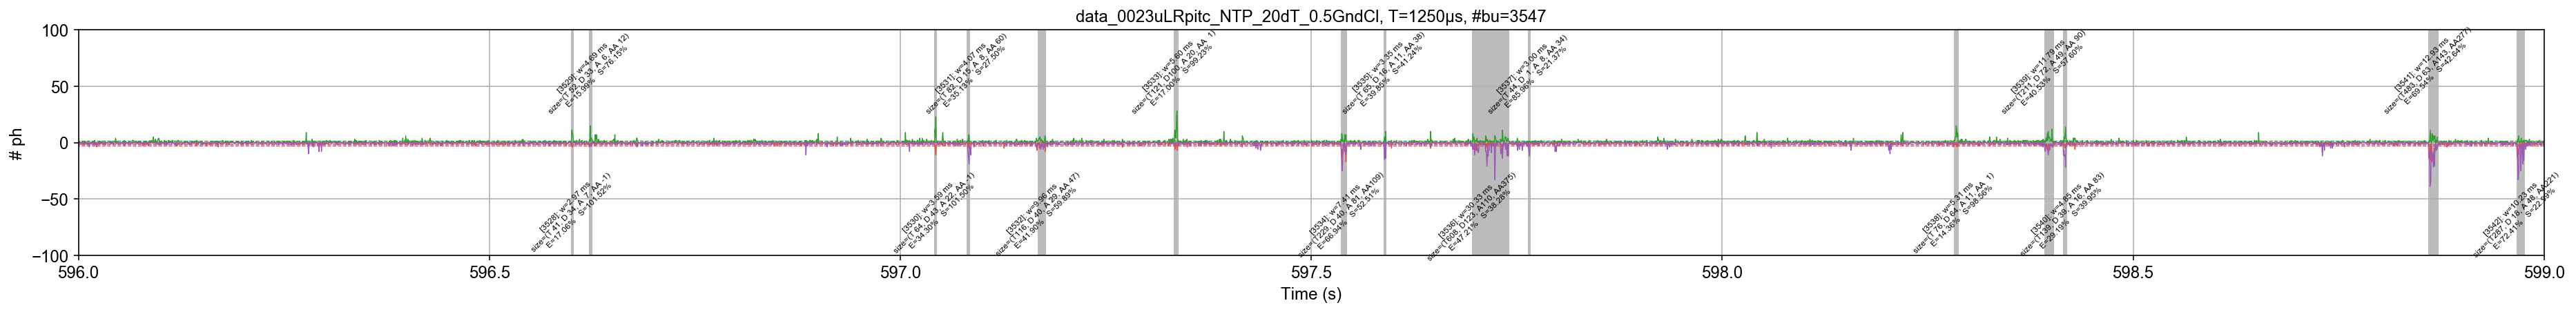

In [7]:
dx = dsf
num_time_points = 6
window = 3
kws = dict(figsize=(32, 3), bursts=True, binwidth=0.5e-3, 
           plot_style=dict(lw=0.7))

# Timepoints equally distributed along the measurement
time_points = np.round(np.linspace(dx.time_min+1, dx.time_max-window-1, num=num_time_points))

for i in time_points:
    ax = dplot(dx, timetrace, tmin=i, tmax=i+window, **kws);
    plt.xlim(i, i+window)
    display(plt.gcf())
    plt.close(plt.gcf())

Double-clicking on each timetrace we can zoom and horizontally scroll. 
Using the zoom in the browser we can see more fine details.

---
**Executed:** Sat Nov 18 16:00:14 2017

**Duration:** 12 seconds.

**Autogenerated from:** [Example - Plotting timetraces with bursts.ipynb](out/Example - Plotting timetraces with bursts.ipynb)